In [1]:
import re
import numpy as np
import matplotlib.pyplot as plt

In [2]:
parameters={}
with open("gromacs_462_swaxs_v01/share/gromacs/top/cromer-mann-defs.itp") as f:
    for line in f:
        if re.match("#define CROMER_MANN_.*",line):
            s=line.split()
            name=re.sub("CROMER_MANN_","",s[1])
            par=np.array(s[2:],dtype="float")
            parameters[name]=par

In [3]:
def f(q,atom):
    a=parameters[atom][0:4]
    b=parameters[atom][4:8]
    c=parameters[atom][8]
    k=q/(4*np.pi**2)
    res=0.0
    for i in range(4):
        res+=a[i]*np.exp(-b[i]*k**2)
    res+=c
    return res

In [4]:
print(parameters.keys())

dict_keys(['NULL', 'Owat', 'Hwat', 'CH', 'CH2', 'CH3', 'NH', 'NH2', 'NH3', 'SH', 'OH', 'H2O', 'N_plus', 'P_minus', 'S_minus', 'Ce_plus', 'H', 'H_minus', 'He', 'Li', 'Li_plus', 'Be', 'Be_2plus', 'B', 'C', 'Cval', 'N', 'O', 'O_minus', 'F', 'F_minus', 'Ne', 'Na', 'Na_plus', 'Mg', 'Mg_2plus', 'Al', 'Al_3plus', 'Si', 'Sival', 'Si_4plus', 'P', 'S', 'Cl', 'Cl_minus', 'Ar', 'K', 'K_plus', 'Ca', 'Ca_2plus', 'Sc', 'Sc_3plus', 'Ti', 'Ti_2plus', 'Ti_3plus', 'Ti_4plus', 'V', 'V_2plus', 'V_3plus', 'V_5plus', 'Cr', 'Cr_2plus', 'Cr_3plus', 'Mn', 'Mn_2plus', 'Mn_3plus', 'Mn_4plus', 'Fe', 'Fe_2plus', 'Fe_3plus', 'Co', 'Co_2plus', 'Co_3plus', 'Ni', 'Ni_2plus', 'Ni_3plus', 'Cu', 'Cu_plus', 'Cu_2plus', 'Zn', 'Zn_2plus', 'Ga', 'Ga_3plus', 'Ge', 'Ge_4plus', 'As', 'Se', 'Br', 'Br_minus', 'Kr', 'Rb', 'Rb_plus', 'Sr', 'Sr_2plus', 'Y', 'Y_3plus', 'Zr', 'Zr_4plus', 'Nb', 'Nb_3plus', 'Nb_5plus', 'Mo', 'Mo_3plus', 'Mo_5plus', 'Mo_6plus', 'Tc', 'Ru', 'Ru_3plus', 'Ru_4plus', 'Rh', 'Rh_3plus', 'Rh_4plus', 'Pd', 'Pd_2p

In [67]:
ions=["Mg_2plus","K_plus"]
ions=["Li_plus","Na_plus","K_plus","Rb_plus","Be_2plus","Mg_2plus","Ca_2plus","Sr_2plus","Owat"]
#ions=["Mg_2plus","Owat"]

In [68]:
fu={}
xx=np.linspace(0,1,100)
for ion in ions:
    fu[ion]=[]
    for x in xx:
        fu[ion].append(f(x,ion)*x**2)
    fu[ion]=np.array(fu[ion])

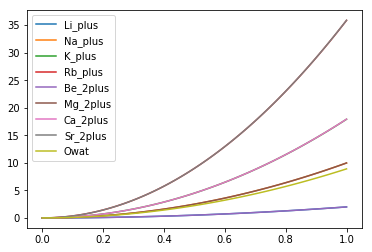

In [69]:
for ion in ions:
    plt.plot(xx,fu[ion],label=ion)
plt.legend()

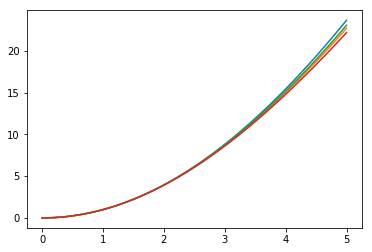

In [55]:
plt.plot(xx,fu["Mg_2plus"]/10)
plt.plot(xx,fu["Ca_2plus"]/18)
plt.plot(xx,fu["Sr_2plus"]/36)
plt.plot(xx,fu["K_plus"]/18)